# Normalization Tutorial

In [8]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In this part we will be covering Normalization techniques like Stemming and Lemmatization provided by popular NLP/Python Libraries for English and some Non-English languages

# Morphology - why we normalize

In [46]:
import spacy
nlp = spacy.load('en') # will download all default pipelines/processors - tokenizer, parser, ner

In [47]:
doc = nlp("I am reading a book")

In [48]:
token = doc[2]  # Reading
nlp.vocab.morphology.tag_map[token.tag_]

{74: 100, 'Aspect_prog': True, 'Tense_pres': True, 'VerbForm_part': True}

In [49]:
token.lemma_

'read'

In [50]:
doc = nlp("I read a book")

In [51]:
token = doc[1]  # Read
nlp.vocab.morphology.tag_map[token.tag_]

{74: 100, 'Tense_past': True, 'VerbForm_fin': True}

In [52]:
token.lemma_

'read'

To understand various Morph features eg: 'VerbForm' use https://universaldependencies.org/u/feat/index.html 

More Examples at : https://spacy.io/usage/linguistic-features#morphology 

# Normalization

Word normalization is the task of putting words/tokens in a standard format, choosing
a single normal form for words with multiple forms like USA and US or uh-huh
and uhhuh. This standardization may be valuable, despite the spelling information
that is lost in the normalization p
**Libraries being used: ntltk, spacy**

Eg: 
* studies - studi (es suffix)
* studying - study (ing suffix)

# 1. Case-Folding

Lowercasing ALL your text data - easy but an essential step for normalization

In [53]:
s1 = "Cat"
s2 = "cat"
s3 = "caT"

In [54]:
print(s1.lower())
print(s2.lower())
print(s3.lower())
# You can Iterate the corpus using the .lower function 

cat
cat
cat


In [55]:
sent = "There are fairly good number of registrations for the conference. More people should be registering in the upcoming days"

In [56]:
import nltk
from nltk.tokenize import word_tokenize
# Punkt Sentence Tokenizer - used specially to use a model to identify sentences
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

1. Tokenize sentence

In [57]:
# Tokenize the sentence
sent = word_tokenize(sent)
print(sent)

['There', 'are', 'fairly', 'good', 'number', 'of', 'registrations', 'for', 'the', 'conference', '.', 'More', 'people', 'should', 'be', 'registering', 'in', 'the', 'upcoming', 'days']


2. Remove Punctuations

In [58]:
# Remove punctuations
def remove_punct(token):
 return [word for word in token if word.isalpha()]
sent = remove_punct(sent)
print(sent)

['There', 'are', 'fairly', 'good', 'number', 'of', 'registrations', 'for', 'the', 'conference', 'More', 'people', 'should', 'be', 'registering', 'in', 'the', 'upcoming', 'days']


# 2. Stemming

The naive version of morphological analysis is called stemming.


# Porter Stemmer

* One of the oldest stemmer. This stemmer is known for its speed and simplicity.
* Limitation: Morphological variants produced are not always real words.


In [59]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

# Using the .stem() function for each word in the sentence
ps_stem_sent = [ps.stem(words_sent) for words_sent in sent]
print(ps_stem_sent)

['there', 'are', 'fairli', 'good', 'number', 'of', 'registr', 'for', 'the', 'confer', 'more', 'peopl', 'should', 'be', 'regist', 'in', 'the', 'upcom', 'day']


Stemming a word or sentence may result in words that are not actual words.

This is due to Over-Stemming and Under-Stemming

# Snowball Stemmer

When compared to the Porter Stemmer, the Snowball Stemmer can map non-English words too. Since it supports other languages the 
* Snowball Stemmer is a multi-lingual stemmer. 
* Snowball stemmer is has greater computational speed than Porter Stemmer.

In [60]:
import nltk
from nltk.stem.snowball import SnowballStemmer
  
#the stemmer requires a language parameter
snow_stemmer = SnowballStemmer(language='english')

# Using the .stem() function for each word in the sentence
ss_stem_sent = [snow_stemmer.stem(words_sent) for words_sent in sent]
print(ss_stem_sent)

['there', 'are', 'fair', 'good', 'number', 'of', 'registr', 'for', 'the', 'confer', 'more', 'peopl', 'should', 'be', 'regist', 'in', 'the', 'upcom', 'day']


#3. Lemmatization


1. Wordnet Lemmatizer
2. spaCy Lemmatization
3. TextBlob Lemmatizer
4. Pattern Lemmatizer
5. Stanford CoreNLP Lemmatization
6. Gensim Lemmatize

# Wordnet


* WordNet is an English dictionary which is a part of Natural Language Tool Kit (NLTK) for Python. This is an extensive library built to make Natural Language Processing (NLP) easy. 

* WordNet has been used for a number of purposes in information systems, including word-sense disambiguation, information retrieval, automatic text classification, automatic text summarization, machine translation and even automatic crossword puzzle generation.

In [61]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
# The perceptron part-of-speech tagger implements part-of-speech tagging using the averaged, structured perceptron algorithm
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [62]:
from nltk.stem import WordNetLemmatizer 

In [63]:
# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

In [64]:
# Lemmatize Single Word

# Use lem_object.lemmatize()
print(lemmatizer.lemmatize("bats"))
print(lemmatizer.lemmatize("are"))
print(lemmatizer.lemmatize("feet"))

bat
are
foot


In [65]:
sentence = "The striped bats are hanging on their feet"

# Tokenize: Split the sentence into words
word_list = nltk.word_tokenize(sentence)
print(word_list)

# Lemmatize list of words and join
print("+==============================+")
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
print(lemmatized_output)

['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet']
+==============================+
The striped bat are hanging on their foot


Notice how 'hanging' wasnt changed to 'hang', 'are' isnt changed to 'be'. Hence to improve performance we can pass the POS tag alongside with the word

In [66]:
# Different stemming as a verb and as a noun
print(lemmatizer.lemmatize("stripes", 'v'))  
print(lemmatizer.lemmatize("stripes", 'n')) 
print(lemmatizer.lemmatize("striped", 'a'))

strip
stripe
striped


In [ ]:
print(nltk.pos_tag(nltk.word_tokenize(sentence)))

[('The', 'DT'), ('striped', 'JJ'), ('bats', 'NNS'), ('are', 'VBP'), ('hanging', 'VBG'), ('on', 'IN'), ('their', 'PRP$'), ('feet', 'NNS')]


you can use https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk to find out which POS tag corresponds to which part of speech

In [67]:
# Simple implementation which included POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1].upper()
    tag_dict = {"JJ": wordnet.ADJ,
                "NNS": wordnet.NOUN,
                "VBP": wordnet.VERB,
                "VBG": wordnet.VERB,
               }

    return tag_dict.get(tag, wordnet.NOUN)

# 3. Lemmatize a Sentence with the appropriate POS tag
sentence = "The striped bats are hanging on their feet"
print([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)])

['The', 'striped', 'bat', 'be', 'hang', 'on', 'their', 'foot']


Notice how using POS improved Normalization

# Spacy

In [68]:
import spacy

# Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en', disable=['parser', 'ner'])

sentence = "The striped bats are hanging on their feet"

# Parse the sentence using the loaded 'en' model object `nlp`
doc = nlp(sentence)

# Extract the lemma for each token using "token.lemma_"
" ".join([token.lemma_ for token in doc])

'the stripe bat be hang on -PRON- foot'

spacy replaces any pronoun by -PRON-

**The spaCy library is one of the most popular NLP libraries along with NLTK. The basic difference between the two libraries is the fact that NLTK contains a wide variety of algorithms to solve one problem whereas spaCy contains only one, but the best algorithm to solve a problem.**

# Hindi Normalization

Non-english languages do not always have their implementations in popular libraries like nltk and spacy
For Indic languages, some available libraries are:
* Indic NLP
* Stanford NLP
* iNLTK

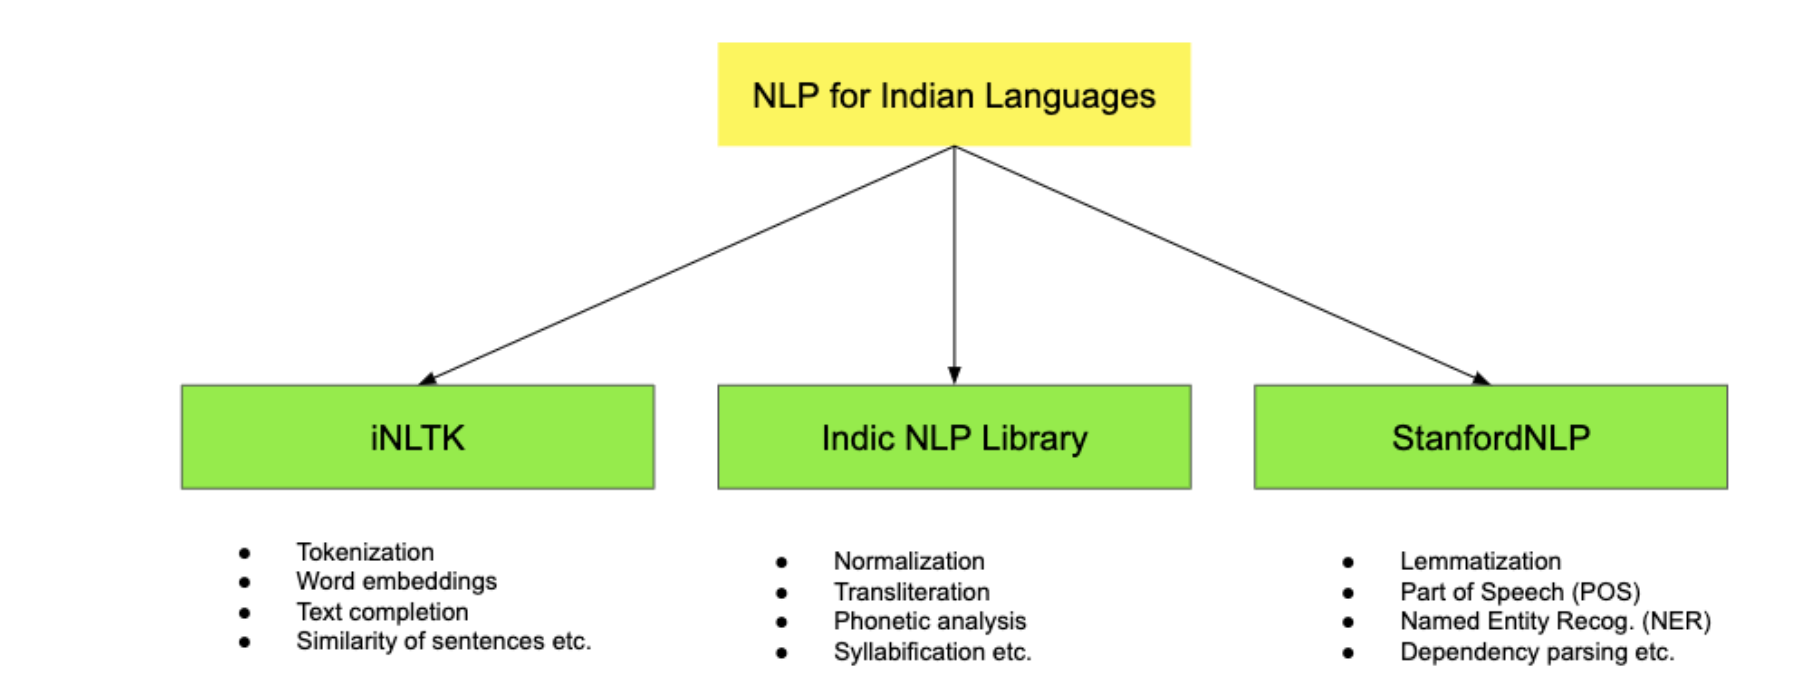

* iNLTK- Hindi, Punjabi, Sanskrit, Gujarati, Kannada, Malyalam, Nepali, Odia, Marathi, Bengali, Tamil, Urdu
* Indic NLP Library- Assamese, Sindhi, Sinhala, Sanskrit, Konkani, Kannada, Telugu,
* StanfordNLP- Many of the above languages

In [2]:
!pip install stanfordnlp

In [4]:
import stanfordnlp
stanfordnlp.download('hi')

Using the default treebank "hi_hdtb" for language "hi".
Would you like to download the models for: hi_hdtb now? (Y/n)
y

Default download directory: /root/stanfordnlp_resources
Hit enter to continue or type an alternate directory.


Download location: /root/stanfordnlp_resources/hi_hdtb_models.zip


100%|██████████| 208M/208M [00:35<00:00, 5.82MB/s]



Download complete.  Models saved to: /root/stanfordnlp_resources/hi_hdtb_models.zip
Extracting models file for: hi_hdtb
Cleaning up...Done.


In [5]:
nlp = stanfordnlp.Pipeline(lang="hi")

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/root/stanfordnlp_resources/hi_hdtb_models/hi_hdtb_tokenizer.pt', 'lang': 'hi', 'shorthand': 'hi_hdtb', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/root/stanfordnlp_resources/hi_hdtb_models/hi_hdtb_tagger.pt', 'pretrain_path': '/root/stanfordnlp_resources/hi_hdtb_models/hi_hdtb.pretrain.pt', 'lang': 'hi', 'shorthand': 'hi_hdtb', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/root/stanfordnlp_resources/hi_hdtb_models/hi_hdtb_lemmatizer.pt', 'lang': 'hi', 'shorthand': 'hi_hdtb', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/root/stanfordnlp_resources/hi_hdtb_models/hi_hdtb_parser.pt', 'pretrain_path': '/root/stanfordnlp_resources/hi_hdtb_models/hi_hdtb.pretrain.pt', 'lang': '

Arguments to the function:
* lang:	str	“en”	Use recommended models for this language.
* models_dir:	str	~/stanfordnlp_resources	Directory for storing the models.
processors	str	“tokenize,mwt,pos,lemma,depparse”	List of processors to use. For a list of all processors supported, see Processors Summary.
* treebank:	str	None	Use models for this treebank. If not specified, Pipeline will look up the default treebank for the language requested.
* use_gpu:	bool	True	Attempt to use a GPU if possible.

In [ ]:
!pip install torch==1.4.0

In [6]:
# Please install pytorch 1.4.0 version to avoid error in the below command
doc = nlp("मैंने पिछले महीने भारत की यात्रा की थी। मैं अभी भारत यात्रा कर रहा हूँ|")

/pytorch/aten/src/ATen/native/LegacyDefinitions.cpp:19: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


In [7]:
for word in doc.sentences[0].words:
    # Access attributes using word.text or word.lemma
    print("{} --> {}".format(word.text,word.lemma))

मैंने --> मैं
पिछले --> पिछला
महीने --> महीना
भारत --> भारत
की --> का
यात्रा --> यात्रा
की --> कर
थी --> था
। --> ।


Notice:
Depending on the Part of speech, the lemmatization for the word has changed
*   की --> का
*   की --> कर

In [9]:
for word in doc.sentences[1].words:
    print("{} --> {}".format(word.text,word.lemma))

मैं --> मैं
अभी --> अभी
भारत --> भारत
यात्रा --> यात्रा
कर --> कर
रहा --> रह
हूँ| --> हूँ


Notice:
*   मैंने - मैं
*   मैं - मैं

# Stemmer- Sanskrit

https://pypi.org/project/sanstem/

In [ ]:
!pip install sanstem

     |████████████████████████████████| 41.4 MB 33 kB/s 
     |████████████████████████████████| 126 kB 63.6 MB/s 
     |████████████████████████████████| 298 kB 49.0 MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52578 sha256=b6f79e2f928fb901e2ec226bf8c00d213cb0a0e0e25571464e0e2a7981adc7b4
  Stored in directory: /root/.cache/pip/wheels/09/bc/67/75c9de8e9726460bc0b101ad225ad025cb8ce9e0759beb9d52
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9834357 sha256=7d9c1f9e608314eb33b342f6c7bf5b5d5c9280126e399b2f41927b7117b5610c
  Stored in directory: /root/.cache/pip/wheels/ed/e4/58/ed2e9f43c07d617cc81fe7aff0fc6e42b16c9cf6afe960b614
  Created wheel for pyicu: filename=PyICU-2.7.4-cp37-cp37m-linux_x86_64.whl size=1374972 sha256=e38347d7edb8d41ea1ee8570d6e668f7a96632ab0a18e0f92325a8b34311acad
  Stored in directory: /root/.cache/pip/wheels/c4/3a/c8/2d2397cd8f6cd04489ecac3d1e6821bb4938d73312d69b834f
Successfully built polyg

In [ ]:
from sanstem import SanskritStemmer

#create a SanskritStemmer object
stemmer = SanskritStemmer()

In [ ]:
inflected_noun = 'गजेन' 
stemmed_noun = stemmer.noun_stem(inflected_noun)
print(stemmed_noun)
# output : गज्

गज्


In [ ]:
inflected_verb = 'गच्छामि'
stemmed_verb = stemmer.verb_stem(inflected_verb)
print(stemmed_verb)
# output : गच्छ्

गच्छ्


https://sanskrit.inria.fr/DICO/index.html#stemmer